In [ ]:
###Correlation of certain attributes to "My cat has met all my expectations" (Satisfaction)
        ###Basic Data###
    
#df["How old is your cat (years)?"].corr(df["My cat has met all my expectations"]) = 0.04307976484563097
#df["Age"].corr(df["My cat has met all my expectations"]) = -0.006850388661670585
#df["How long have you owned your cat (years)?"].corr(df["My cat has met all my expectations"]) = 0.061180697260684785
#df["How would you describe your cat's weight?"].corr(df["My cat has met all my expectations"]) = -0.0460786957621361


        ###Behaviour###

#df["My cat behaves aggressively (i.e. growls, hisses, bites and swipes with claws) towards me when I stroke him/her"].corr(df["My cat has met all my expectations"]) = -0.23239282855063673
#df["My cat behaves aggressively (i.e. growls, hisses, bites, swipes with claws) towards me when I perform routine health procedures (such as grooming/carrying out health checks, or when administering medication, etc.)"].corr(df["My cat has met all my expectations"]) = -0.20382161585398914
#df["Does your cat urinate inside the house in a location other than the litter tray?"].corr(df["My cat has met all my expectations"]) = 0.16919238198200726
#df["Does your cat display any behavioural problems"].corr(df["My cat has met all my expectations"]) = 0.16919238198200726
#df["My cat tries to avoid me when I try to encourage interactions (i.e. when I call his/her name in a friendly voice, when I make kissing noises, or crouch down and offer it my fingers etc.)"].corr(df["My cat has met all my expectations"]) = -0.23279754989792173

        ###Medical Issues
#df["Does your cat vomit?"].corr(df["My cat has met all my expectations"]) = 0.010614900555367797
#df["Does your cat suffer from diarrhoea?"].corr(df["My cat has met all my expectations"]) = 0.016550768817678342
#


In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from scipy import stats

In [4]:
df= pd.read_excel("data_set\pet-set.xlsx")
pd.set_option("display.max_columns", 120)
pd.set_option("display.max_rows", 120)
df.head(2) 

,How old is your cat (years)?,How long have you owned your cat (years)?,Is your cat male or female?,Where did you get your cat from?,Other (please specify),Is your cat neutered?,What breed is your cat?,Other (please specify).1,Does your cat have access to the outdoors?,"If yes, does your cat have constant access, or is this restricted in some way (i.e. the cat is kept in at night or is only let out when someone is home)",Does your cat have a litter tray?,Does your cat have any existing medical conditions?,"If yes, what condition does he/she suffer from?",Was this condition present before you acquired your cat?,Does your cat display any behavioural problems,"If yes, what behavioural problem does he/she display?",Was this problem present before you acquired your cat?,Does your cat suffer from a urinary tract infection (e.g. cystitis)?,Does your cat urinate inside the house in a location other than the litter tray?,"Does your cat spray urine on any vertical surfaces (e.g. curtains, kitchen, cabinets, doors, walls)?",Does your cat defecate inside the house in a location other than the litter tray?,Does your cat vomit?,Does your cat suffer from diarrhoea?,Does your cat suffer from constipation?,How would you describe your cat's weight?,What is the condition of your cat's coat (1-poor condition - 5-excellent condition),My cat is keen to explore new things in his/her environment,My cat is playful,My cat is vocal when around people,"My cat behaves aggressively (i.e. growls, hisses, bites, swipes with claws) towards me when I perform routine health procedures (such as grooming/carrying out health checks, or when administering medication, etc.)","My cat tries to avoid me when I try to encourage interactions (i.e. when I call his/her name in a friendly voice, when I make kissing noises, or crouch down and offer it my fingers etc.)",My cat tries to avoid me when I go to stroke him/her or tickle his/her chin/cheeks,"When I initiate contact or interaction with my cat, he/she doesn't move away but it is quiet and not very responsive towards me (i.e. it doesn't purr or rub up against me)","My cat behaves aggressively (i.e. growls, hisses, bites and swipes with claws) towards me when I stroke him/her","My cat will come and say ""hello"" and approach me (i.e. the cat will approach and make physical contact with me), but will then wander off or move away shortly afterwards rather than staying for a long fuss","My cat comes and asks me for attention and initiates contact with me (e.g. the cat comes and sits on my knee, or rubs up against me and around me, in order to receive fuss/strokes/chin/cheek tickles)","My cat gets carried away during play, which has led me to being bitten or swiped",I avoid stroking or handling my cat because I feel that he/she doesn't want me to,"I avoid stroking my cat because I think he/she will behave aggressively towards me (i.e. growl, hiss, bite, swipe with claws)",My cat seems angry around me,My cat is more keen to interact with and be near me when I have food/treats,My cat is comfortable being picked up,My cat is timid,My cat is quick to settle and to adapt to change,"My cat would prefer to be left alone, rather than be with people",My cat likes being stroked,My cat is very tolerant to being handled,"If my cat could choose, it would prefer to have a bowl of food rather than interaction with me","My cat has negatively changed the way he/she interacts with me since I first acquired him/her (e.g. has become more fearful, behaves aggressively, is less friendly)","My cat has positively changed in the way he/she interacts with me since I first acquired him/her (e.g. has become less fearful, behaves less aggressively, is more friendly)",My cat behaves differently with strangers than he/she does with me,My cat behaves differently with me than he/she does with other (human) members of the household,My cat is friendly,My cat is fearful,My cat has met all my expectations,I am happy with my cat,I feel my cat is happy living w

In [17]:
df.shape
df.replace("NaN",np.nan, inplace =True)

#fillna(0,inplace=True)


In [18]:
###General Statistics Data Description ###
df.fillna(0).describe()

#df["How old is your cat (years)?"].corr(df["My cat has met all my expectations"])= 0.04307976484563097



,How old is your cat (years)?,How long have you owned your cat (years)?,How many other cats live in the household (not including the cat you have described)
count,3331.000000,3331.000000,3331.000000
mean,7.165116,6.157911,1.329030
std,4.824462,4.652906,2.169636
min,1.000000,1.000000,0.000000
25%,3.000000,2.000000,0.000000
50%,6.000000,5.000000,1.000000
75%,10.000000,9.000000,2.000000
max,24.000000,30.000000,32.000000


In [19]:
df["I am happy with my cat"].value_counts()

Strongly agree                2794
Agree                          395
0                               83
Neither agree nor disagree      39
Disagree                        16
Strongly disagree                4
Name: I am happy with my cat, dtype: int64

In [20]:
### Changed the string data into numeric data  >>> float64
        ###Basic Data of cat
df["I am happy with my cat"].replace({"Strongly agree": 5, "Agree": 4, "Neither agree nor disagree": 3, "Disagree": 2, "Strongly disagree": 1}, inplace= True)
df["My cat has met all my expectations"].replace({"Strongly agree": 5, "Agree": 4, "Neither agree nor disagree": 3, "Disagree": 2, "Strongly disagree": 1}, inplace= True)


df["Is your cat male or female?"].replace({"Male":1, "Female":2},inplace= True)


        ###Behaviour of cat
df["My cat behaves aggressively (i.e. growls, hisses, bites and swipes with claws) towards me when I stroke him/her"].replace({"Never": 1, "Occasionally": 2, "Once": 3, "Usually": 4, "Always": 5}, inplace= True)
df["My cat behaves aggressively (i.e. growls, hisses, bites, swipes with claws) towards me when I perform routine health procedures (such as grooming/carrying out health checks, or when administering medication, etc.)"].replace({"Never": 1, "Occasionally": 2, "Once": 3, "Usually": 4, "Always": 5}, inplace= True)
df["Does your cat urinate inside the house in a location other than the litter tray?"].replace({"Never": 1, "Occasionally": 2, "Once": 3, "Often": 4, "Always": 5}, inplace= True)
df["Does your cat display any behavioural problems"].replace({"Yes": 1, "No": 2}, inplace= True)
df["My cat tries to avoid me when I try to encourage interactions (i.e. when I call his/her name in a friendly voice, when I make kissing noises, or crouch down and offer it my fingers etc.)"].replace({"Never": 1, "Occasionally": 2, "Once": 3, "Usually": 4, "Always": 5}, inplace= True)
df["Does your cat defecate inside the house in a location other than the litter tray?"].replace({"Never": 1, "Occasionally": 2, "Once": 3, "Often": 4, "Always": 5}, inplace= True)
df["My cat is friendly"].replace({"Strongly agree": 5, "Agree": 4, "Neither agree nor disagree": 3, "Disagree": 2, "Strongly disagree": 1}, inplace= True)


        ###Medical condition of cat
df["Does your cat vomit?"].replace({"Never": 1, "Occasionally": 2, "Once": 3, "Often": 4, "Always": 5}, inplace= True)
df["Does your cat suffer from diarrhoea?"].replace({"Never": 1, "Occasionally": 2, "Once": 3, "Often": 4, "Always": 5}, inplace= True)
df["How would you describe your cat's weight?"].replace({ "Very underweight": 1, "Underweight": 2, "Normal": 3, "Overweight": 4, "Very overweight": 5}, inplace= True)
df["Does your cat suffer from constipation?"].replace({"Never": 1, "Occasionally": 2, "Once": 3, "Often": 4, "Always": 5}, inplace= True)
df["What is the condition of your cat's coat (1-poor condition - 5-excellent condition)"].replace({"5 (e.g. the coat is shiny and silky with no mats or bald patches)": 5, "4 (e.g. the coat is generally shiny and silky, but can occasionally be a bit dirty or greasy, but there are no mats or bald patches)": 4, "3 (e.g. the coat is slightly dirty and/or greasy, and/or a few mats and/or a few bald patches)": 3, "2 (e.g. the coat is generally quite dirty, and/or greasy, and/or several mats and/or several bald patches)": 2, "1 (e.g. the coat is very dirty and/or greasy, and/or lots of mats and/or lots of bald patches)": 1},inplace= True)


        ###Personality of cat owner
df["Age"].replace({"18-24": 1, "25-34": 2, "35-44": 3, "45-54": 4, "55-64": 5, "65 and over": 6}, inplace= True)
df["Gender"].replace({"Male": 1, "Female": 2, "Prefer not to say": 3}, inplace= True)
df["I see myself as someone who.....Tends to find fault with others"].replace({"Disagree strongly": 5, "Disagree a little": 4, "Neither agree nor disagree": 3, "Agree a little":2, "Agree strongly":1}, inplace= True)
df["I see myself as someone who.....Does a thorough job"].replace({"Disagree strongly": 1, "Disagree a little": 2, "Neither agree nor disagree": 3, "Agree a little":4, "Agree strongly":5}, inplace= True)
df["I see myself as someone who.....Is depressed, blue"].replace({"Disagree strongly": 5, "Disagree a little": 4, "Neither agree nor disagree": 3, "Agree a little":2, "Agree strongly":1}, inplace= True)
df["I see myself as someone who.....Is relaxed, handles stress well"].replace({"Disagree strongly": 1, "Disagree a little": 2, "Neither agree nor disagree": 3, "Agree a little":4, "Agree strongly":5}, inplace= True)
df["I see myself as someone who… Tends to be lazy"].replace({"Disagree strongly": 5, "Disagree a little": 4, "Neither agree nor disagree": 3, "Agree a little":2, "Agree strongly":1}, inplace= True)





In [21]:
### recheck if the datatype changed accordingly
df["My cat tries to avoid me when I try to encourage interactions (i.e. when I call his/her name in a friendly voice, when I make kissing noises, or crouch down and offer it my fingers etc.)"].dtype

dtype('int64')

In [22]:
###Test
pd.to_numeric(df["Age"], errors= "raise")

0       2
1       2
2       1
3       1
4       2
       ..
3326    5
3327    4
3328    1
3329    3
3330    2
Name: Age, Length: 3331, dtype: int64

In [23]:
### There is no correlation between age of the cat and the satisfaction of the owner 
df["How old is your cat (years)?"].corr(df["My cat has met all my expectations"])
### There is no correlation between age of the owner and the satisfaction of the owner 
df["Age"].corr(df["My cat has met all my expectations"])
### There is no  correlation between the the years a pet owner owns a catand the satisfaction
df["How long have you owned your cat (years)?"].corr(df["My cat has met all my expectations"])
### There is a slight correlation between the aggressiveness of a cat and the owner satisfaction
df["My cat behaves aggressively (i.e. growls, hisses, bites and swipes with claws) towards me when I stroke him/her"].corr(df["My cat has met all my expectations"])
### There is no  correlation between the behavioural problems of a pet and  the satisfaction of a pet owner
df["Does your cat display any behavioural problems"].corr(df["My cat has met all my expectations"])
### There is no correlation between if the cat urinates inside the house and the satisfaction of the owner
df["Does your cat urinate inside the house in a location other than the litter tray?"].corr(df["My cat has met all my expectations"])
### There is no correlation between if the cat vomits and the satisfaction of the owner
df["Does your cat vomit?"].corr(df["My cat has met all my expectations"])
### There is no correlation between if the cat suffers from diarrhoea and the owners satisfaction
df["Does your cat suffer from diarrhoea?"].corr(df["My cat has met all my expectations"])
### There is no correlation between the weight of the cat and the satisfaction of the owner
df["How would you describe your cat's weight?"].corr(df["My cat has met all my expectations"])
### There is only a slight correlation between the interaction level and the satisfaction of the owner
df["My cat tries to avoid me when I try to encourage interactions (i.e. when I call his/her name in a friendly voice, when I make kissing noises, or crouch down and offer it my fingers etc.)"].corr(df["My cat has met all my expectations"])
### There is a slight correlation between the aggressiveness of a cat and the owner satisfaction
df["My cat behaves aggressively (i.e. growls, hisses, bites, swipes with claws) towards me when I perform routine health procedures (such as grooming/carrying out health checks, or when administering medication, etc.)"].corr(df["My cat has met all my expectations"])





-0.1417801191070252

In [36]:
data_cat_basic = {'SF0': df["My cat has met all my expectations"],
        'SF1': df["I am happy with my cat"],
        'A': df["How long have you owned your cat (years)?"],
        'B': df["How would you describe your cat's weight?"],
        'C': df["How old is your cat (years)?"],
        'D': df["Is your cat male or female?"],
        }

# creation of new DataFrame
df1 = pd.DataFrame(data_cat_basic,columns= ["SF0","SF1","A","B","C","D"])
df1.corr()

,SF0,SF1,A,B,C,D
SF0,1.000000,0.785479,0.061684,-0.038256,0.052746,-0.012188
SF1,0.785479,1.000000,0.033651,-0.004337,0.036206,-0.003533
A,0.061684,0.033651,1.000000,-0.115521,0.882036,0.027222
B,-0.038256,-0.004337,-0.115521,1.000000,-0.105212,-0.027958
C,0.052746,0.036206,0.882036,-0.105212,1.000000,0.039809
D,-0.012188,-0.003533,0.027222,-0.027958,0.039809,1.000000


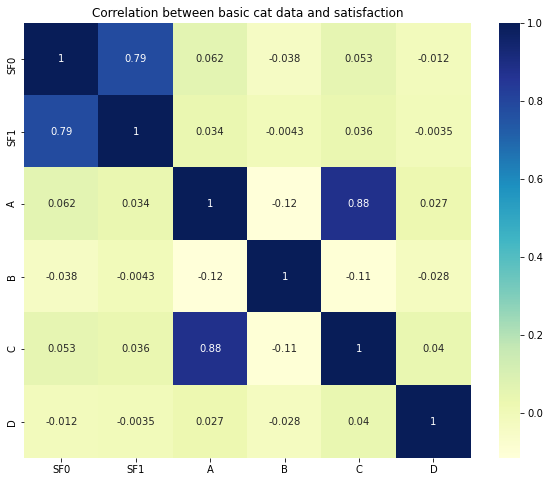

In [37]:
corrMatrix1 = df1.corr()
ax=plt.axes()
sns.heatmap(corrMatrix1,annot= True, ax=ax, cmap="YlGnBu")
ax.set_title("Correlation between basic cat data and satisfaction")
plt.gcf().set_size_inches(10, 8)

plt.show()


In [38]:
data_cat_behaviour = {'SF0': df["My cat has met all my expectations"],
        'SF1': df["I am happy with my cat"],
        'A': df["My cat behaves aggressively (i.e. growls, hisses, bites and swipes with claws) towards me when I stroke him/her"],
        'B': df["My cat behaves aggressively (i.e. growls, hisses, bites, swipes with claws) towards me when I perform routine health procedures (such as grooming/carrying out health checks, or when administering medication, etc.)"],
        'C': df["Does your cat urinate inside the house in a location other than the litter tray?"],
        'D': df["Does your cat display any behavioural problems"],
        'E': df["My cat tries to avoid me when I try to encourage interactions (i.e. when I call his/her name in a friendly voice, when I make kissing noises, or crouch down and offer it my fingers etc.)"],
        'F': df["Does your cat defecate inside the house in a location other than the litter tray?"],
        'G': df["My cat is friendly"]
        }

# creation of new DataFrame
df2 = pd.DataFrame(data_cat_behaviour,columns= ["SF0","SF1","A","B","C","D","E","F","G"])
df2.corr()

,SF0,SF1,A,B,C,D,E,F,G
SF0,1.000000,0.785479,-0.180788,-0.141780,-0.034942,0.113834,-0.185383,-0.018411,0.616888
SF1,0.785479,1.000000,-0.118782,-0.081477,-0.027744,0.087171,-0.113772,0.003170,0.632585
A,-0.180788,-0.118782,1.000000,0.368462,0.013331,-0.145142,0.278170,0.040358,-0.219015
B,-0.141780,-0.081477,0.368462,1.000000,0.028189,-0.134721,0.222158,0.048181,-0.212684
C,-0.034942,-0.027744,0.013331,0.028189,1.000000,-0.151324,0.023906,0.272913,-0.039412
D,0.113834,0.087171,-0.145142,-0.134721,-0.151324,1.000000,-0.078056,-0.088530,0.137589
E,-0.185383,-0.113772,0.278170,0.222158,0.023906,-0.078056,1.000000,0.041817,-0.215224
F,-0.018411,0.003170,0.040358,0.048181,0.272913,-0.088530,0.041817,1.000000,-0.018244
G,0.616888,0.632585,-0.219015,-0.212684,-0.039412,0.137589,-0.215224,-0.018244,1.000000


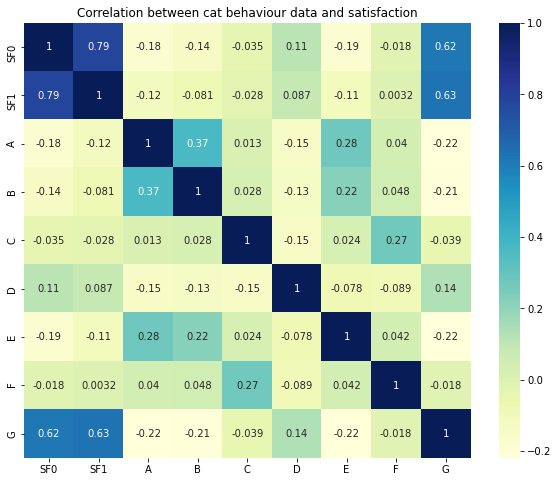

In [39]:
corrMatrix2 = df2.corr()
ax=plt.axes()
sns.heatmap(corrMatrix2,annot= True, ax=ax, cmap="YlGnBu")
ax.set_title("Correlation between cat behaviour data and satisfaction")
plt.gcf().set_size_inches(10, 8)

plt.show()

In [27]:
data_cat_medical = {'SF0': df["My cat has met all my expectations"],
        'SF1': df["I am happy with my cat"],
        'B': df["Does your cat vomit?"],
        'C': df["Does your cat suffer from diarrhoea?"],
        'D': df["How would you describe your cat's weight?"],
        'E': df["What is the condition of your cat's coat (1-poor condition - 5-excellent condition)"],
        'F': df["Does your cat suffer from constipation?"],
        'G': df["Does your cat defecate inside the house in a location other than the litter tray?"]
        }

# creation of new DataFrame
df3 = pd.DataFrame(data_cat_medical,columns= ["SF0","SF1","A","B","C","D","E","F","G"])
df3.corr()

,SF0,SF1,B,C,D,E,F,G
SF0,1.000000,0.785479,0.035092,0.016332,-0.038256,0.037345,0.015314,-0.018411
SF1,0.785479,1.000000,0.047033,0.026390,-0.004337,0.026270,0.035091,0.003170
B,0.035092,0.047033,1.000000,0.139644,-0.019892,-0.069521,0.125020,0.078133
C,0.016332,0.026390,0.139644,1.000000,-0.034612,-0.070464,0.166886,0.135839
D,-0.038256,-0.004337,-0.019892,-0.034612,1.000000,0.088663,-0.041119,-0.049240
E,0.037345,0.026270,-0.069521,-0.070464,0.088663,1.000000,-0.108991,-0.078514
F,0.015314,0.035091,0.125020,0.166886,-0.041119,-0.108991,1.000000,0.101932
G,-0.018411,0.003170,0.078133,0.135839,-0.049240,-0.078514,0.101932,1.000000


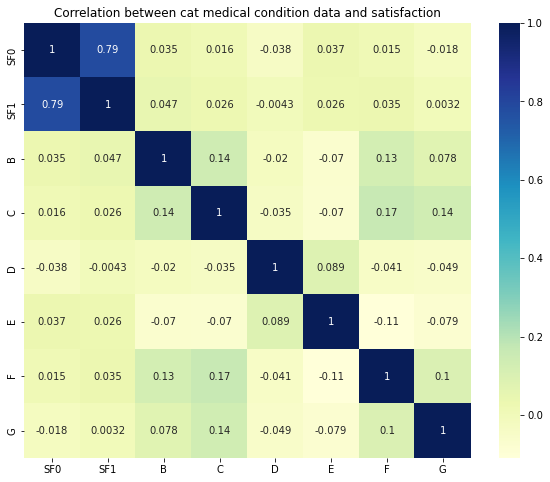

In [35]:
corrMatrix3 = df3.corr()
ax=plt.axes()
sns.heatmap(corrMatrix3,annot= True, ax=ax, cmap="YlGnBu")
ax.set_title("Correlation between cat medical condition data and satisfaction")
plt.gcf().set_size_inches(10, 8)

plt.show()

In [40]:
data_cat_owner = {'SF0': df["My cat has met all my expectations"],
        'SF1': df["I am happy with my cat"],
        'A': df["Age"],
        'B': df["Gender"],
        'C': df["How many other cats live in the household (not including the cat you have described)"],
        'D': df["I see myself as someone who.....Tends to find fault with others"],
        'E': df["I see myself as someone who.....Does a thorough job"],
        'F': df["I see myself as someone who.....Is depressed, blue"],
        'G': df["I see myself as someone who.....Is relaxed, handles stress well"],
        'G': df["I see myself as someone who… Tends to be lazy"]
        }

# creation of new DataFrame
df4 = pd.DataFrame(data_cat_owner,columns= ["SF0","SF1","A","B","C","D","E","F","G","H"])
df4.corr()

,SF0,SF1,A,B,C,D,E,F,G
SF0,1.000000,0.785479,0.235591,0.487447,0.138356,0.277242,0.435267,0.256543,0.265834
SF1,0.785479,1.000000,0.293767,0.635065,0.127067,0.334372,0.521665,0.321640,0.316876
A,0.235591,0.293767,1.000000,0.242621,0.119540,0.227427,0.198475,0.205747,0.245242
B,0.487447,0.635065,0.242621,1.000000,0.109965,0.318286,0.477807,0.285717,0.301629
C,0.138356,0.127067,0.119540,0.109965,1.000000,0.068771,0.055436,0.012555,0.062346
D,0.277242,0.334372,0.227427,0.318286,0.068771,1.000000,0.351931,0.382523,0.332153
E,0.435267,0.521665,0.198475,0.477807,0.055436,0.351931,1.000000,0.417482,0.511690
F,0.256543,0.321640,0.205747,0.285717,0.012555,0.382523,0.417482,1.000000,0.388960
G,0.265834,0.316876,0.245242,0.301629,0.062346,0.332153,0.511690,0.388960,1.000000


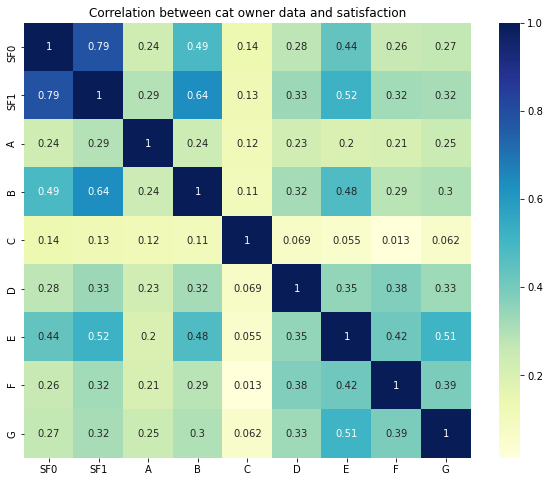

In [41]:
corrMatrix4 = df4.corr()
ax=plt.axes()
sns.heatmap(corrMatrix4,annot= True, ax=ax, cmap="YlGnBu")
ax.set_title("Correlation between cat owner data and satisfaction")
plt.gcf().set_size_inches(10, 8)

plt.show()